In [8]:
# https://discuss.pytorch.org/t/i-have-3-gpu-why-torch-cuda-device-count-only-return-1/7245/4
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
__pyTorch VERSION: 1.7.0
__CUDA VERSION
/usr/bin/sh: 1: nvcc: not found
__CUDNN VERSION: 8003
__Number CUDA Devices: 2
__Devices
Active CUDA Device: GPU 1
Available devices  2
Current cuda device  1


In [9]:
%load_ext autoreload
%autoreload 2

import os
import json
import main
from tqdm import tqdm
import numpy as np
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# arguments
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
args = parser.parse_args('')

args.project_name = 'ContrastiveLearning-SET-Wildcard-Expand-Union-27'
args.data_path = '../Raw_Datasets/SET/WildCardSETidxUnion-3Attr-3Vals-8Pairs-0Train-5120Val-5120Test.json'
args.mode = 'test'
args.resume_checkpoint_dir = (
    'checkpoints/ContrastiveLearning-SET-Wildcard-Expand-Union-27/20210331-140216-Con;Vec16;L8H8Lk4Hk2;scheduledAdamW36000;16878.04Kparams_runId_jtxu7vf0')
args.ckpt_name = 'last.ckpt'
args.runID = 'jtxu7vf0'
args.gpu = 1
args.approve_before_training = False
args.aml = False
args.dataset_name = None

In [11]:
trainmodule, game_datamodule = main.main(args)

---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------
----------hparams----------
seed : 42
batch_size : 1024
max_epochs : 20000000000
val_every_n_epoch : 200
d_model : 512
embed_dropout : 0.0
vec_repr : 16
model : contrastive
d_ff : 1024
N_enc : 8
num_heads : 8
N_enc_key : 4
num_heads_key : 2
attn_wt_tying_scheme : untie_QKVO
attn_wt_dropout : 0.0
heads_dropout : 0.0
pff_dropout : 0.0
representation_pos : 0
dotproduct_bottleneck : True
normalize_dotproduct : False
contrastive_use_infoNCE 

Global seed set to 42


 : 0.1
nonlinear_classifier_scale_down_factor : [1, 1, 1]
contrastive_optimizer : scheduled_adam
cosine_annealing_T_max : 30
adam_lr : 1e-05
adam_beta1 : 0.9
adam_beta2 : 0.999
adam_epsilon : 1e-08
adam_weight_decay : 0
sgd_lr : 0.001
sgd_momentum : 0
scheduled_adam_beta1 : 0.9
scheduled_adam_beta2 : 0.98
scheduled_adam_epsilon : 1e-06
scheduled_adam_warmup_steps : 36000
additional_lr_decay : True
additional_lr_decay_gamma : 0.9
decay_lr_starts : 36000
decay_lr_stops : 80000
decay_lr_interval : 2000
generative_overall_lr_scale : 1.0
contrastive_overall_lr_scale : 1.0
gradient_clip_val : 0.0
debug : False
extra_monitors : False
mode : test
key_support_size : 27
num_attributes : 3
num_attr_vals : 3
union_only : True
vocab_size : 74
vocab_by_property : False
( : 64
) : 65
NULL : 66
SEP : 67
SOS : 68
EOS : 69
PAD : 70
PLH : 71
| : 72
! : 73
max_len_q : 16
N_pairs : 8
len_k : 1
resume_checkpoint_dir : checkpoints/ContrastiveLearning-SET-Wildcard-Expand-Union-27/20210331-140216-Con;Vec16;L8H

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]{0.07035500556230545, 0.8221233487129211, 0.8316117525100708, 0.9756450057029724, 0.8788043260574341, 0.9753701090812683, 0.7824551463127136, 0.8683136105537415, 8.707619667053223, 9.572189331054688, 10.699952125549316, 11.50101375579834, 12.513795852661133, 13.4710693359375, 14.445395469665527, 15.317721366882324, 16.270620346069336, 17.207334518432617, 18.288145065307617, 19.211837768554688, 20.221181869506836, 21.329822540283203, 22.29155158996582, 23.434127807617188, 24.488731384277344, 25.700000762939453, 18.676109313964844, 27.0, 19.78650665283203, 0.05502944067120552, 0.03703700006008148, 0.04345918446779251, 0.05852862820029259, 0.10416235029697418, 7.8666672706604, 7.960000038146973, 0.047262564301490784, 0.08565646409988403, 0.04980803281068802, 8.273333549499512, 8.84095287322998, 9.0, 9.95555591583252, 9.415238380432129, 9.867222785949707, 10.92527961730957, 10.464690208435059, 10.825557708740234, 11.820259094238281, 11.

## KL Loss Analysis

In [61]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(np.array(x) - np.max(x, axis=-1).reshape(-1, 1))
    return e_x / np.sum(e_x, axis=-1).reshape(-1, 1)

def entropy(x):
    return - np.sum(x * np.log2(x), axis=-1)

top 50th data indices by kl loss [1320 2079 2928 1334  913 4770  419  154 4242 2186 4981  201 3230  538
 2780 3661 4028 2659  669  305 3157 1480  667 2984 2149 2093 4785 2814
 3404 1742 1981 1158 3031 3815 1931 4061 3721 4204 4883 4860  833 4142
 3416 2023 4301 1989  679 1067 2359 1527]


(array([2.091e+03, 1.305e+03, 9.150e+02, 4.650e+02, 1.950e+02, 8.300e+01,
        4.100e+01, 1.900e+01, 5.000e+00, 1.000e+00]),
 array([2.58719549e-04, 4.37505396e-02, 8.72423596e-02, 1.30734180e-01,
        1.74226000e-01, 2.17717820e-01, 2.61209640e-01, 3.04701460e-01,
        3.48193280e-01, 3.91685100e-01, 4.35176920e-01]),
 <BarContainer object of 10 artists>)

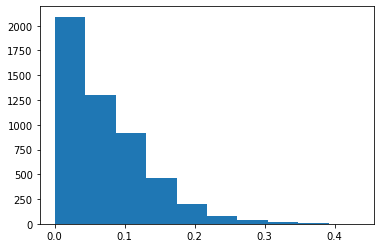

In [65]:
p = 'checkpoints/ContrastiveLearning-SET-Wildcard-Expand-Union-27/20210331-140216-Con;Vec16;L8H8Lk4Hk2;scheduledAdamW36000;16878.04Kparams_runId_jtxu7vf0/test_metrics.json'

with open(p, 'r') as f:
    res = json.load(f)
    
full_kl_loss = [row for batch in res['full_kl_loss'] for row in batch]
full_logits = [row for batch in res['full_logits'] for row in batch]
full_probs = softmax(full_logits)

full_kl_loss_sum_row = np.sum(np.array(full_kl_loss), axis=-1)
sorted_indices = np.argsort(full_kl_loss_sum_row)
print('top 50th data indices by kl loss', sorted_indices[:50])

plt.hist(full_kl_loss_sum_row)

In [13]:
full_kl_loss_sum_row[sorted_indices]

array([2.58719549e-04, 2.60300112e-04, 2.62384183e-04, ...,
       3.76018967e-01, 3.83465104e-01, 4.35176920e-01])

In [14]:
game_data = main.load_data(args.data_path)
gt_counts = np.array([len(gt_idxs) for gt_idxs in game_data['test_gt_idxs']])

---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------


In [8]:
print(gt_counts[sorted_indices].tolist()[::-1])

[14, 13, 11, 11, 13, 14, 12, 10, 10, 9, 11, 13, 14, 13, 12, 16, 12, 12, 13, 13, 10, 16, 15, 12, 15, 11, 9, 12, 14, 15, 12, 13, 15, 14, 12, 10, 15, 15, 13, 15, 12, 11, 13, 16, 18, 12, 16, 12, 17, 17, 15, 19, 15, 12, 16, 14, 17, 17, 15, 18, 16, 9, 16, 10, 18, 13, 16, 12, 12, 17, 17, 15, 16, 10, 15, 18, 17, 17, 12, 14, 15, 16, 16, 15, 17, 17, 15, 15, 19, 13, 16, 12, 11, 12, 10, 14, 14, 17, 9, 20, 14, 14, 16, 15, 19, 17, 16, 12, 12, 18, 13, 12, 17, 15, 14, 17, 18, 10, 17, 14, 14, 13, 18, 12, 15, 9, 14, 11, 16, 14, 13, 14, 18, 16, 16, 12, 12, 10, 17, 13, 19, 15, 18, 20, 16, 16, 21, 17, 18, 16, 18, 17, 13, 15, 17, 18, 15, 15, 18, 13, 17, 14, 15, 13, 17, 14, 13, 20, 17, 16, 15, 13, 13, 14, 10, 19, 17, 16, 12, 18, 16, 17, 16, 15, 16, 19, 16, 16, 18, 14, 20, 17, 13, 17, 13, 17, 12, 13, 9, 18, 12, 16, 17, 18, 18, 12, 16, 14, 17, 16, 21, 14, 18, 16, 15, 17, 14, 16, 8, 16, 16, 17, 17, 19, 15, 16, 18, 17, 17, 13, 8, 17, 12, 15, 17, 16, 11, 17, 15, 13, 13, 14, 13, 12, 11, 16, 17, 18, 14, 17, 13, 14,

In [22]:
game_data['test_tokens'][14]

[[15, 23, 25, 45, 25, 15, 23, 20, 21, 53, 11, 40, 7, 50, 25, 9], [14]]

In [20]:
game_data['test_gt_idxs'][14]

[3, 26, 21, 17, 1, 10, 12, 19, 23, 25, 5, 16, 14, 9, 22, 15, 8, 11, 13]

In [9]:
full_logits[14]

[0.18026217818260193,
 0.3252143859863281,
 0.16052576899528503,
 -0.032874345779418945,
 -2.258411169052124,
 -0.10146795958280563,
 0.051502421498298645,
 -0.2054767906665802,
 0.35103702545166016,
 0.40811359882354736,
 0.5515713691711426,
 0.13662225008010864,
 0.46303147077560425,
 0.644846498966217,
 0.1858367621898651,
 0.14000193774700165,
 0.0978655219078064,
 0.7220062613487244,
 0.10117848217487335,
 0.17418335378170013,
 -0.007957912981510162,
 0.508604109287262,
 0.3606632351875305,
 0.4939596951007843,
 0.12863723933696747,
 0.4698261022567749,
 0.4147576093673706]

In [70]:
sorted_indices.tolist()[::-1]

[779,
 373,
 3834,
 4781,
 3556,
 837,
 3102,
 1050,
 4486,
 4362,
 3890,
 503,
 1207,
 3931,
 424,
 650,
 4237,
 4834,
 2938,
 2914,
 4244,
 2353,
 2739,
 4145,
 611,
 331,
 3705,
 4592,
 4921,
 1291,
 3699,
 4361,
 1753,
 4652,
 1964,
 3848,
 2622,
 4257,
 4381,
 1848,
 2459,
 411,
 1998,
 4583,
 4534,
 317,
 2937,
 5082,
 1740,
 4934,
 4023,
 14,
 467,
 1790,
 1465,
 1217,
 2962,
 875,
 1275,
 659,
 888,
 495,
 2909,
 5015,
 153,
 4006,
 2247,
 4838,
 4245,
 1866,
 2052,
 2765,
 924,
 1304,
 3542,
 3544,
 1126,
 3284,
 3707,
 2430,
 933,
 2473,
 3875,
 2140,
 4505,
 4643,
 275,
 4183,
 3978,
 3309,
 1493,
 4302,
 401,
 1057,
 3963,
 1023,
 1119,
 3308,
 1020,
 574,
 1880,
 4413,
 2518,
 481,
 3203,
 266,
 451,
 4923,
 3849,
 848,
 2191,
 4403,
 4299,
 685,
 2846,
 1236,
 2873,
 1782,
 4722,
 919,
 4577,
 5027,
 3851,
 1475,
 4122,
 2935,
 2855,
 2654,
 5012,
 756,
 2696,
 3621,
 1680,
 3753,
 4455,
 4842,
 1413,
 2801,
 2066,
 2025,
 1435,
 155,
 1128,
 4090,
 5065,
 3617,
 4586,
 3

(array([5., 3., 3., 5., 1., 5., 4., 0., 0., 1.]),
 array([1.47934252e-15, 3.45336297e-01, 6.90672594e-01, 1.03600889e+00,
        1.38134519e+00, 1.72668149e+00, 2.07201778e+00, 2.41735408e+00,
        2.76269038e+00, 3.10802667e+00, 3.45336297e+00]),
 <BarContainer object of 10 artists>)

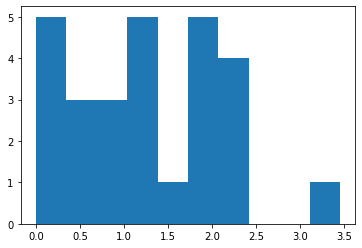

In [73]:
plt.hist(np.exp(full_logits[1207]))

In [116]:
full_probs_10_20 = np.array(full_probs)[(gt_counts > 10) & (gt_counts <20)]
full_probs_12_15 = np.array(full_probs)[(gt_counts > 12) & (gt_counts <25)]

(array([5., 3., 3., 5., 1., 5., 4., 0., 0., 1.]),
 array([4.47554846e-17, 1.04476774e-02, 2.08953547e-02, 3.13430321e-02,
        4.17907094e-02, 5.22383868e-02, 6.26860642e-02, 7.31337415e-02,
        8.35814189e-02, 9.40290962e-02, 1.04476774e-01]),
 <BarContainer object of 10 artists>)

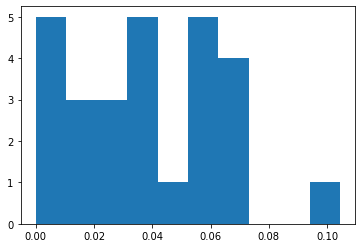

In [120]:
plt.hist(full_probs[1207])

In [66]:
np.mean(entropy(full_probs))

4.312216172637886

In [118]:
np.mean(entropy(full_probs_10_20))

4.110834250583842

In [117]:
np.mean(entropy(full_probs_12_15))

4.2742813450364405

(array([7., 1., 5., 1., 4., 2., 1., 4., 0., 2.]),
 array([4.96680736e-41, 9.58866505e-03, 1.91773301e-02, 2.87659951e-02,
        3.83546602e-02, 4.79433252e-02, 5.75319903e-02, 6.71206553e-02,
        7.67093204e-02, 8.62979854e-02, 9.58866505e-02]),
 <BarContainer object of 10 artists>)

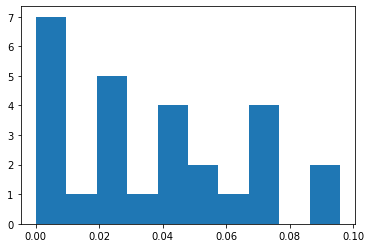

In [119]:
plt.hist(full_probs[373])

(array([11.,  3.,  1.,  2.,  1.,  2.,  3.,  3.,  0.,  1.]),
 array([1.        , 1.01230614, 1.02461229, 1.03691843, 1.04922458,
        1.06153072, 1.07383686, 1.08614301, 1.09844915, 1.11075529,
        1.12306144]),
 <BarContainer object of 10 artists>)

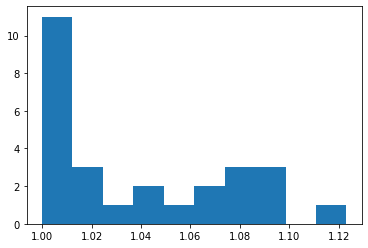

In [91]:
plt.hist(np.exp(full_probs[3834]))

<BarContainer object of 28 artists>

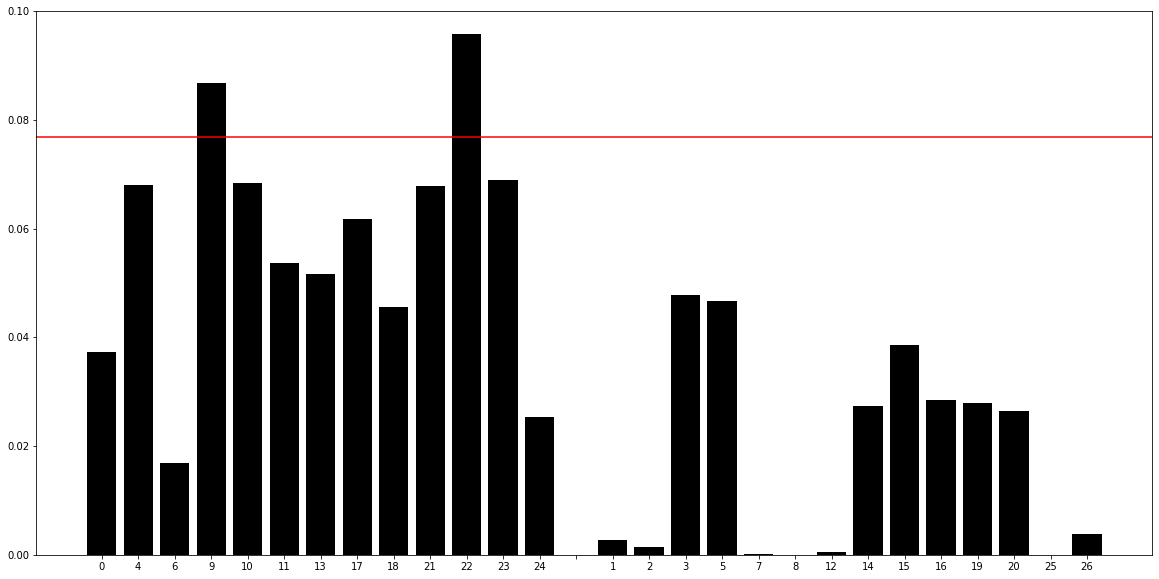

In [122]:
gt_idxs_373 = sorted(game_data['test_gt_idxs'][373])
not_gt_idxs_373 = [i for i in range(27) if not i in gt_idxs_373]

plt.figure(figsize=(20,10))
plt.ylim(0.0, 0.1)

plt.axhline(y=1./gt_counts[373], color='r', linestyle='-')

plt.bar(
    [str(idx) for idx in gt_idxs_373] + [' '] + [str(idx) for idx in not_gt_idxs_373],  
    list(full_probs[373][gt_idxs_373]) + [0] + list(full_probs[373][not_gt_idxs_373]),
    color='k'
)


In [114]:
entropy(full_probs[373])

4.239908066904067

In [125]:
np.mean(entropy(full_probs))

4.312216172637886

In [123]:
full_probs_10_20 = np.array(full_probs)[(gt_counts > 10) & (gt_counts <20)]
np.mean(entropy(full_probs_10_20))

4.110834250583842

## Embedding Analysis

In [22]:
%load_ext autoreload
%autoreload 2

from dataset import BatchFetcher
from metrics import find_nn, analogy, find_cos, find_dotproduct, find_euclidean
from dataraw_sampling import construct_card_idx_lookup

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
cuda_device = trainmodule.model._parameters['key_bias_terms'].device

game_data = main.load_data(args.data_path)
batch_fecther = BatchFetcher(
    raw_data = game_data, device=cuda_device)

---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------


In [24]:
queries = [[(0,1,3),(0,0,0)], [(0,1,3),(1,2,0)]]
keys = [[(0,0,0)],[(0,1,0)],[(2,2,2)]]
X_query, X_key = batch_fecther.make_query_batch(X_query_properties=queries, X_key_properties=None, X_key=[i for i in range(game_data['key_support_size'])])
query_repr, key_repr = trainmodule.pull_repr(X_query, X_key)

In [25]:
query_repr

tensor([[ -32.6787,   21.0110,   60.8990,   72.0602,  -12.1188,   88.0601,
          -40.6650,   84.7236,  -33.4589,  -80.7799,  -99.3379,  -13.9059,
          -21.1398,    2.9614,  -72.5601,   -7.3001],
        [ -13.3058,  -14.4384,   36.8405,  -26.7359,  -83.6170,   99.8903,
          -95.6221,  -57.8334, -112.8150,   -0.8270,  -31.9814,  -75.6339,
          -49.7704,   22.4096,  -12.8809,   -4.8576]], device='cuda:1')

In [26]:
# Do the linear analogy for keys first
key_repr

tensor([[-4.2527e-03,  5.3604e-03, -6.6171e-03, -1.9003e-02,  2.6855e-04,
          2.3965e-02,  4.6882e-02, -4.2465e-02, -2.6501e-02,  4.0132e-02,
          2.3824e-02,  2.5711e-02,  4.5592e-02, -2.2066e-02,  1.8525e-02,
         -3.2184e-02],
        [ 1.6898e-02,  5.0760e-02,  5.3460e-02,  3.2941e-03,  5.7913e-02,
         -1.7477e-01,  2.4473e-01,  1.1670e-01, -3.6651e-01,  3.5327e-01,
          1.1657e-01,  9.1191e-02, -6.4576e-03, -6.2874e-02, -2.7341e-01,
         -2.5735e-01],
        [ 6.2547e-03, -1.7649e-02, -3.1802e-02,  2.1898e-02,  5.3618e-02,
         -3.9124e-02,  6.3812e-02, -5.7259e-03, -3.6482e-02,  1.7656e-02,
         -9.4196e-03,  7.5388e-03,  5.5224e-02,  3.7801e-02, -3.7048e-02,
          1.9598e-02],
        [-1.1729e-01,  1.9702e-01,  9.4153e-03,  1.5264e-01, -1.0870e-01,
          9.1666e-02,  1.3654e-01, -4.4932e-02,  1.7890e-01,  2.5350e-02,
          1.0193e-01, -5.4825e-02,  2.9662e-01, -1.3923e-01,  3.0403e-02,
         -3.2485e-01],
        [-1.6602e-01

In [36]:
key_repr_normalized = key_repr / torch.linalg.norm(key_repr, ord=2, dim=-1).view(-1,1)

torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])


(array([ 27.,  27.,   0.,  81., 216.,  27.,  54.,  54.,  27.,   0.,   0.,
          0.,  27.,  81.,   0.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  27.,  27.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  27.]),
 array([-0.00781014, -0.00627268, -0.00473523, -0.00319777, -0.00166031,
        -0.00012285,  0.00141461,  0.00295207,  0.00448953,  0.00602698,
         0.00756444,  0.0091019 ,  0.01063936,  0.01217682,  0.01371428,
         0.01525174,  0.01678919,  0.01832665,  0.01986411,  0.02140157,
         0.02293903,  0.02447649,  0.02601395,  0.0275514 ,  0.02908886,
         0.03062632,  0.03216378,  0.03370124,  0.0352387 ,  0.03677615,
         0.03831361,  0.03985107,  0.04138853,  0.04292599,  0.04446345,
         0.04600091,  0.04753836,  0.04907582,  0.05061328,  0.05215074,
         0.0536882 ,  0.05522566,  0.05676312,  0.05830057,  0.05983803,
 

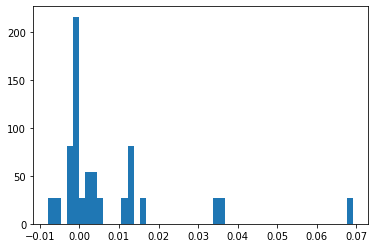

In [82]:
# unnormalized
distances = []

for i in range(27):
    nn_idx, nn_dists = find_nn(v=key_repr[0], Wv=key_repr, similarity_fn=find_dotproduct, k=27)
    distances += nn_dists.tolist()
    
import matplotlib.pyplot as plt
import numpy as np
plt.hist(distances, bins=50)

torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])


(array([108.,  27.,  54., 135.,  27.,   0.,  81.,   0.,   0.,  54.,  27.,
          0.,  27.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  54.,   0.,
          0.,  27.,   0.,   0.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  27.,   0.,
          0.,   0.,   0.,   0.,   0.,  27.]),
 array([-0.09140158, -0.06957354, -0.04774551, -0.02591748, -0.00408944,
         0.01773859,  0.03956663,  0.06139466,  0.08322269,  0.10505073,
         0.12687876,  0.1487068 ,  0.17053483,  0.19236286,  0.2141909 ,
         0.23601893,  0.25784697,  0.279675  ,  0.30150303,  0.32333107,
         0.3451591 ,  0.36698714,  0.38881517,  0.4106432 ,  0.43247124,
         0.45429927,  0.47612731,  0.49795534,  0.51978337,  0.54161141,
         0.56343944,  0.58526747,  0.60709551,  0.62892354,  0.65075158,
         0.67257961,  0.69440764,  0.71623568,  0.73806371,  0.75989175,
         0.78171978,  0.80354781,  0.82537585,  0.84720388,  0.86903192,
 

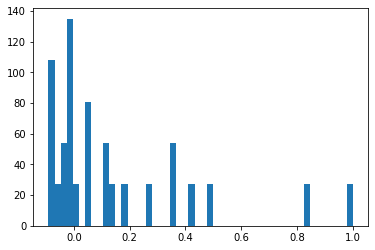

In [86]:
distances = []

for i in range(27):
    nn_idx, nn_dists = find_nn(v=key_repr_normalized[0], Wv=key_repr_normalized, similarity_fn=find_cos, k=27)
    distances += nn_dists.tolist()
    
import matplotlib.pyplot as plt
import numpy as np
plt.hist(distances, bins=50)

In [87]:
np.var(distances), np.mean(distances), np.sum(distances)

(0.07415085152141467, 0.1443189940656777, 105.20854667387903)

In [29]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(game_data['num_attributes'], game_data['num_attr_vals'])

def linear_analogy_by_props(propertiesA, propertiesB, propertiesC, card2idx_lookup, idx2card_lookup):
    keyidxA = card2idx_lookup[propertiesA]
    keyidxB = card2idx_lookup[propertiesB]
    keyidxC = card2idx_lookup[propertiesC]

    print(keyidxA, keyidxB, keyidxC)

    vA = key_repr[keyidxA]
    vB = key_repr[keyidxB]
    vC = key_repr[keyidxC]

    nns_idx, nns_distances = analogy(vA, vB, vC, key_repr, similarity_fn=find_cos, k=None)
    nns_properties = [idx2card_lookup[idx.item()] for idx in nns_idx]
    print(nns_idx, nns_distances)
    print(nns_properties)

In [17]:
# vec 16
linear_analogy_by_props(
    propertiesA = (2,2,1), 
    propertiesB = (2,2,0), 
    propertiesC = (1,1,1), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

25 24 13
torch.Size([16])
tensor([13, 12, 14, 16, 23,  5,  9, 21,  0, 22,  1, 18,  2,  4, 15, 26, 20,  8,
         3, 24, 10,  6, 11, 19, 17,  7, 25], device='cuda:1') tensor([ 0.6625,  0.4359,  0.3446,  0.3238,  0.2579,  0.1624,  0.1402,  0.0975,
         0.0765,  0.0410,  0.0308,  0.0256,  0.0198,  0.0019, -0.0131, -0.0144,
        -0.0170, -0.0299, -0.0357, -0.0589, -0.0685, -0.0906, -0.1622, -0.1782,
        -0.3266, -0.3419, -0.7537], device='cuda:1')
[(1, 1, 1), (1, 1, 0), (1, 1, 2), (1, 2, 1), (2, 1, 2), (0, 1, 2), (1, 0, 0), (2, 1, 0), (0, 0, 0), (2, 1, 1), (0, 0, 1), (2, 0, 0), (0, 0, 2), (0, 1, 1), (1, 2, 0), (2, 2, 2), (2, 0, 2), (0, 2, 2), (0, 1, 0), (2, 2, 0), (1, 0, 1), (0, 2, 0), (1, 0, 2), (2, 0, 1), (1, 2, 2), (0, 2, 1), (2, 2, 1)]


In [18]:
# vec 16
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,2,1), 
    propertiesC = (0,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 25 8
torch.Size([16])
tensor([ 8,  2, 25, 26, 11, 17, 19, 20, 23, 24,  1,  7, 15, 10, 22,  0,  6,  5,
         9, 14,  3, 18,  4, 12, 13, 16, 21], device='cuda:1') tensor([ 0.7596,  0.6634,  0.5691,  0.2043,  0.1940,  0.1902,  0.1802,  0.1696,
         0.1669,  0.1637,  0.1636,  0.1083,  0.0911,  0.0883,  0.0881,  0.0621,
         0.0537,  0.0247,  0.0077, -0.0104, -0.0909, -0.0942, -0.0956, -0.1043,
        -0.1195, -0.1235, -0.1400], device='cuda:1')
[(0, 2, 2), (0, 0, 2), (2, 2, 1), (2, 2, 2), (1, 0, 2), (1, 2, 2), (2, 0, 1), (2, 0, 2), (2, 1, 2), (2, 2, 0), (0, 0, 1), (0, 2, 1), (1, 2, 0), (1, 0, 1), (2, 1, 1), (0, 0, 0), (0, 2, 0), (0, 1, 2), (1, 0, 0), (1, 1, 2), (0, 1, 0), (2, 0, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1), (1, 2, 1), (2, 1, 0)]


In [19]:
# vec 16
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,0,1), 
    propertiesC = (2,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 19 26
torch.Size([16])
tensor([26, 24, 15, 23, 14, 25, 19, 22, 10, 13, 17, 12,  8, 20,  5,  6,  9,  2,
         1, 11,  7, 16, 18,  4,  0,  3, 21], device='cuda:1') tensor([ 0.9753,  0.8072,  0.2070,  0.1994,  0.1990,  0.1950,  0.1725,  0.1418,
         0.1245,  0.1155,  0.1090,  0.0992,  0.0880,  0.0651,  0.0485,  0.0293,
         0.0229,  0.0038, -0.0039, -0.0489, -0.0514, -0.0604, -0.0615, -0.0621,
        -0.0839, -0.1860, -0.2537], device='cuda:1')
[(2, 2, 2), (2, 2, 0), (1, 2, 0), (2, 1, 2), (1, 1, 2), (2, 2, 1), (2, 0, 1), (2, 1, 1), (1, 0, 1), (1, 1, 1), (1, 2, 2), (1, 1, 0), (0, 2, 2), (2, 0, 2), (0, 1, 2), (0, 2, 0), (1, 0, 0), (0, 0, 2), (0, 0, 1), (1, 0, 2), (0, 2, 1), (1, 2, 1), (2, 0, 0), (0, 1, 1), (0, 0, 0), (0, 1, 0), (2, 1, 0)]


In [22]:
# vec 16
linear_analogy_by_props(
    propertiesA = (2,2,1), 
    propertiesB = (2,2,1), 
    propertiesC = (2,2,0), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

25 25 24
torch.Size([16])
tensor([24, 26, 15,  6, 25, 14, 12, 17, 13, 23,  1, 19, 22, 10,  9,  7,  8,  5,
        18,  4, 16, 20,  2,  0, 21,  3, 11], device='cuda:1') tensor([ 1.0000e+00,  8.0590e-01,  7.1588e-01,  3.3758e-01,  2.6389e-01,
         1.4120e-01,  1.2782e-01,  7.0533e-02,  5.3902e-02,  5.0637e-02,
         4.9744e-02,  4.2136e-02,  3.9595e-02,  2.7262e-02,  8.0941e-04,
        -9.2919e-05, -1.8811e-02, -3.5239e-02, -4.4427e-02, -6.1315e-02,
        -6.8744e-02, -8.2491e-02, -8.9917e-02, -9.1402e-02, -1.1744e-01,
        -1.7063e-01, -1.8255e-01], device='cuda:1')
[(2, 2, 0), (2, 2, 2), (1, 2, 0), (0, 2, 0), (2, 2, 1), (1, 1, 2), (1, 1, 0), (1, 2, 2), (1, 1, 1), (2, 1, 2), (0, 0, 1), (2, 0, 1), (2, 1, 1), (1, 0, 1), (1, 0, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (2, 0, 0), (0, 1, 1), (1, 2, 1), (2, 0, 2), (0, 0, 2), (0, 0, 0), (2, 1, 0), (0, 1, 0), (1, 0, 2)]


In [23]:
# vec 16
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,0,1), 
    propertiesC = (0,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 19 8
torch.Size([16])
tensor([ 8,  2, 20, 23, 11, 19,  5,  0, 10,  1,  9, 26, 22, 14, 12, 24, 17, 18,
        15,  6,  4,  3, 21, 25, 13,  7, 16], device='cuda:1') tensor([ 0.9787,  0.8681,  0.2565,  0.2357,  0.2029,  0.1656,  0.1350,  0.1323,
         0.1244,  0.1075,  0.1044,  0.0708,  0.0520,  0.0360,  0.0177, -0.0134,
        -0.0149, -0.0178, -0.0231, -0.0232, -0.0708, -0.0786, -0.0800, -0.1057,
        -0.1314, -0.1510, -0.2267], device='cuda:1')
[(0, 2, 2), (0, 0, 2), (2, 0, 2), (2, 1, 2), (1, 0, 2), (2, 0, 1), (0, 1, 2), (0, 0, 0), (1, 0, 1), (0, 0, 1), (1, 0, 0), (2, 2, 2), (2, 1, 1), (1, 1, 2), (1, 1, 0), (2, 2, 0), (1, 2, 2), (2, 0, 0), (1, 2, 0), (0, 2, 0), (0, 1, 1), (0, 1, 0), (2, 1, 0), (2, 2, 1), (1, 1, 1), (0, 2, 1), (1, 2, 1)]


In [24]:
# vec 16
linear_analogy_by_props(
    propertiesA = (1,0,1), 
    propertiesB = (2,0,1), 
    propertiesC = (1,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

10 19 17
torch.Size([16])
tensor([17, 25,  1,  6,  3, 14, 22, 11,  0, 15, 24, 26, 21,  2,  8,  7,  4, 13,
        16,  9, 12, 18, 23,  5, 19, 20, 10], device='cuda:1') tensor([ 0.7326,  0.2305,  0.2158,  0.1826,  0.1689,  0.1486,  0.1200,  0.0872,
         0.0645,  0.0563,  0.0404,  0.0294, -0.0498, -0.0510, -0.0714, -0.0722,
        -0.0835, -0.0843, -0.1142, -0.1253, -0.1441, -0.1522, -0.1546, -0.1856,
        -0.1955, -0.2414, -0.6082], device='cuda:1')
[(1, 2, 2), (2, 2, 1), (0, 0, 1), (0, 2, 0), (0, 1, 0), (1, 1, 2), (2, 1, 1), (1, 0, 2), (0, 0, 0), (1, 2, 0), (2, 2, 0), (2, 2, 2), (2, 1, 0), (0, 0, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (1, 1, 1), (1, 2, 1), (1, 0, 0), (1, 1, 0), (2, 0, 0), (2, 1, 2), (0, 1, 2), (2, 0, 1), (2, 0, 2), (1, 0, 1)]
